In [291]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.ticker import MultipleLocator
pd.set_option('display.float_format', lambda x: f'{x:.0f}')

In [292]:
# Dataframes from Raw Data
phone_df = pd.read_csv('Text&PhoneBanking_Data.xlsx - Attempts.csv')
text_df = pd.read_csv('TextBanking_Efforts.xlsx - Attempts.csv')
walking_df = pd.read_csv('BlockWalking_Effort.xlsx - BlockWalkingAttempts.csv')
mail_df = pd.read_csv('GOTVMailers_Efforts.xlsx - MailAttempts.csv')


In [293]:
# Cleaning Data
phone_df.dropna(inplace=True)
phone_df.drop_duplicates(inplace=True)
phone_df = phone_df[['Voter ID','Result']]
phone_df = phone_df[phone_df['Voter ID'] != "--"]
phone_df = phone_df[phone_df['Result'] == "Talked to Correct Person"]


text_df.dropna(inplace=True)
text_df.drop_duplicates(inplace=True)
text_df = text_df[['Voter ID','message_direction']]
text_df = text_df[text_df['message_direction'] == "incoming"]
text_df = text_df[text_df['Voter ID'] != "--"]

walking_df.dropna(inplace=True)
walking_df.drop_duplicates(inplace=True)
walking_df = walking_df[['Voter ID', 'result of attempt']]
# Canvassed are the successful attempts
walking_df = walking_df[walking_df['result of attempt'] == "Canvassed"]

mail_df.drop_duplicates(inplace=True)

In [294]:
# Dataframes of Successful Contacts for each method
phone_df

,Voter ID,Result
46,2172420768,Talked to Correct Person
67,1119172087,Talked to Correct Person
76,2172018228,Talked to Correct Person
134,1186407421,Talked to Correct Person
160,1180944303,Talked to Correct Person
...,...,...
12950,2159936357,Talked to Correct Person
12963,2192446496,Talked to Correct Person
12976,2129092335,Talked to Correct Person
12995,2125231965,Talked to Correct Person


In [295]:
text_df

,Voter ID,message_direction
62,2141361716,incoming
117,1212892020,incoming
204,1104248838,incoming
270,2001223992,incoming
312,2128428129,incoming
...,...,...
18649,2187594419,incoming
18651,2159906912,incoming
18652,2187100985,incoming
18653,2159906977,incoming


In [296]:
walking_df

,Voter ID,result of attempt
14,1190763748,Canvassed
15,1186729886,Canvassed
20,2141173305,Canvassed
48,2146340102,Canvassed
53,2127479936,Canvassed
...,...,...
7060,1119203572,Canvassed
7070,2143658566,Canvassed
7071,2163374000,Canvassed
7077,2161200346,Canvassed


In [297]:
print('phone shape:', phone_df.shape)
print('text shape:', text_df.shape)
print('walking shape:', walking_df.shape)

phone shape: (225, 2)
text shape: (1071, 2)
walking shape: (1139, 2)


In [298]:
voters_1 = pd.read_csv('nov_voters_1.csv', low_memory=False)
voters_2 = pd.read_csv('nov_voters_2.csv', low_memory=False)
voters_3 = pd.read_csv('nov_voters_3.csv', low_memory=False)

print(voters_1.shape, voters_2.shape, voters_3.shape)
temp = pd.concat([voters_1, voters_2])
voters = pd.concat([temp, voters_3])
voters.drop(['DATE_VOTED', 'Voting Site', 'Congressional House District'], inplace=True, axis=1)
print(voters.shape)

voters.head()

(450000, 10) (319108, 9) (207401, 10)
(976509, 8)


,Unnamed: 0,Voter ID,VOTE_TYPE,CITY,ZIP,SEX,BIRTHYEAR,Voting Precinct
0,0,1102134232,P,HOUSTON,77007,M,1952,1
1,1,1102253308,P,HOUSTON,77009,F,1947,1
2,2,1102030272,E,HOUSTON,77007,F,1944,1
3,3,1102253312,M,HOUSTON,77009,F,1948,1
4,4,1102253349,P,HOUSTON,77009,M,1949,1


In [299]:
phone = 0
phone_df['Voter ID'] = pd.to_numeric(phone_df['Voter ID'])
print(voters['Voter ID'])
print(phone_df['Voter ID'])

for voter in phone_df['Voter ID'].values:
    if voter in voters['Voter ID'].values:
        if phone < 10:
            print(voter, voters['Voter ID'].values[np.where(voters['Voter ID'].values == voter)])
        phone += 1
print(phone)



0        1102134232
1        1102253308
2        1102030272
3        1102253312
4        1102253349
            ...    
207396   2194023638
207397   2193150950
207398   2140341941
207399   2194037695
207400   2189544505
Name: Voter ID, Length: 976509, dtype: float64
46       2172420768
67       1119172087
76       2172018228
134      1186407421
160      1180944303
            ...    
12950    2159936357
12963    2192446496
12976    2129092335
12995    2125231965
13014    2122797446
Name: Voter ID, Length: 225, dtype: int64
2172420768 [2.17242077e+09]
1119172087 [1.11917209e+09]
2169459356 [2.16945936e+09]
2184698426 [2.18469843e+09]
2166232310 [2.16623231e+09]
1189640785 [1.18964078e+09]
2129478678 [2.12947868e+09]
2159863986 [2.15986399e+09]
2152046737 [2.15204674e+09]
2123599062 [2.12359906e+09]
49


In [300]:
walk = 0
walking_df['Voter ID'] = walking_df['Voter ID'].astype('int64')
print(voters['Voter ID'].values)
print(walking_df['Voter ID'].values)

for voter in walking_df['Voter ID'].values:
    if voter in voters['Voter ID'].values:
        walk += 1
print(walk)


[1.10213423e+09 1.10225331e+09 1.10203027e+09 ... 2.14034194e+09
 2.19403770e+09 2.18954450e+09]
[1190763748 1186729886 2141173305 ... 2163374000 2161200346 1116289094]
137


In [301]:
text = 0
text_df['Voter ID'] = pd.to_numeric(text_df['Voter ID'])
print(text_df['Voter ID'])

for voter in text_df['Voter ID'].values:
    if voter in voters['Voter ID'].values:
        text += 1
print(text)

62       2141361716
117      1212892020
204      1104248838
270      2001223992
312      2128428129
            ...    
18649    2187594419
18651    2159906912
18652    2187100985
18653    2159906977
18654    2137485609
Name: Voter ID, Length: 1071, dtype: int64
178


In [302]:
# voting rate/successful contact
phone_rate = 100*(phone/(phone_df.shape[0]))
text_rate = 100*(text/(text_df.shape[0]))
walk_rate = 100*(walk/(walking_df.shape[0]))
print('Percentage Participation for Phone:', phone_rate)
print('Percentage Participation for Text:', text_rate)
print('Percentage Participation for Walking:', walk_rate)

Percentage Participation for Phone: 21.777777777777775
Percentage Participation for Text: 16.619981325863677
Percentage Participation for Walking: 12.028094820017559


In [303]:
data = [["Phone", phone_rate], ["Text", text_rate], ["Block Walking", walk_rate]]
pd.set_option('display.float_format', lambda x: f'{x:.2f}')
efficacy = pd.DataFrame(data, columns=["Method", "Percentage"])

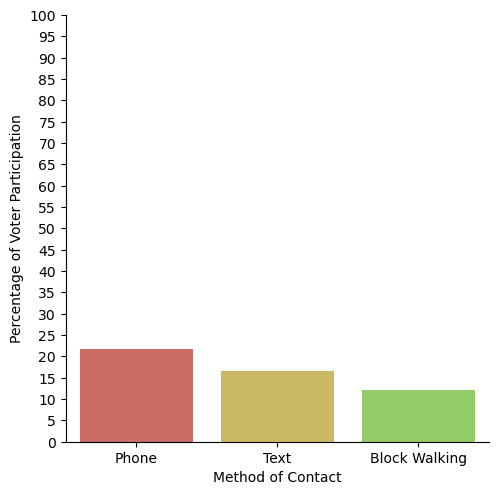

In [304]:
efficacy_plot = sns.catplot(x='Method', y='Percentage', kind='bar',data=efficacy, dodge=False, palette=sns.color_palette("hls", 8))
# , aspect=0.5, height=8
efficacy_plot.ax.set_ylim(0, 100)
for ax in efficacy_plot.axes.flat:
    ax.yaxis.set_major_locator(MultipleLocator(5))
efficacy_plot.set_axis_labels("Method of Contact", "Percentage of Voter Participation")
plt.show(efficacy_plot)

In [305]:
mail = 0
mail_df['Voter ID'] = pd.to_numeric(mail_df['Voter ID'])
print(mail_df['Voter ID'])
for voter in mail_df['Voter ID'].values:
    if voter in voters['Voter ID'].values:
        mail += 1
print(mail)

0        1110293474
1        1107166208
2        2000717608
3        2177434872
4        2173469771
            ...    
37423    1111809228
37424    1119229211
37425    1119237451
37426    1176842902
37427    1190056887
Name: Voter ID, Length: 37428, dtype: int64
11211


In [306]:
phone_cost = 0.13
per_vote_phone = ((phone_cost * 7008)/phone)
text_cost = 0.06
per_vote_text = ((text_cost * 10167)/text)
walking_cost = 2
per_vote_walk = ((walking_cost * 6668)/walk)
mail_cost = 0.35
per_vote_mail = ((mail_cost * 37428)/mail)
print("Cost Per Vote - Phone:", per_vote_phone)
print("Cost Per Vote - Text:", per_vote_text)
print("Cost Per Vote - Block Walking:", per_vote_walk)
print("Cost Per Vote - Mail:", per_vote_mail)

Cost Per Vote - Phone: 18.592653061224492
Cost Per Vote - Text: 3.427078651685393
Cost Per Vote - Block Walking: 97.34306569343066
Cost Per Vote - Mail: 1.1684773882793684


In [307]:
cost_per_vote = pd.DataFrame([["Phone", per_vote_phone], ["Text", per_vote_text], ["Block Walking", per_vote_walk], ["Mail", per_vote_mail]], columns=["Method", "Cost Per Vote"])
cost_per_vote

,Method,Cost Per Vote
0,Phone,18.59
1,Text,3.43
2,Block Walking,97.34
3,Mail,1.17


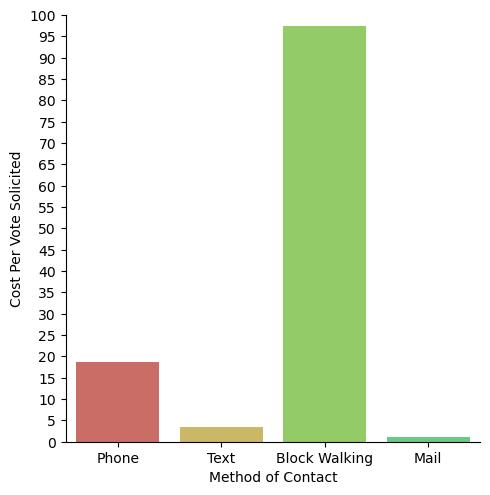

In [308]:
cost_plot = sns.catplot(x='Method', y='Cost Per Vote', kind='bar',data=cost_per_vote, dodge=False, palette=sns.color_palette("hls", 8))
cost_plot.ax.set_ylim(0, 100)
cost_plot.set_axis_labels("Method of Contact", "Cost Per Vote Solicited")
for ax in cost_plot.axes.flat:
    ax.yaxis.set_major_locator(MultipleLocator(5))
plt.show(cost_plot)